In [68]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv("spam.csv",encoding='latin-1')

In [74]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Cleaning

In [75]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [76]:
df.shape

(5572, 5)

In [77]:
# drop last three columns
df = df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [78]:
df = df.rename(columns={'v1':'target','v2':'text'})

In [79]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [80]:
df = df.drop_duplicates()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   object
 1   text    5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [84]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### EDA

In [85]:
df['target'].value_counts() # imbalance dataset

target
0    4516
1     653
Name: count, dtype: int64

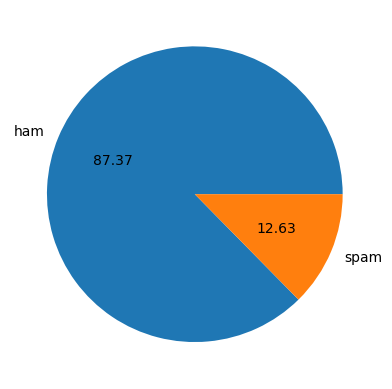

In [86]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [87]:
# finding number of character 
df["number_character"] = df['text'].apply(len)

In [88]:
import nltk
from nltk import word_tokenize,sent_tokenize

In [89]:
# finding the number of words 
df["number_words"] = df["text"].apply(lambda x:len(word_tokenize(x)))

In [90]:
# finding the number of sentences
df["number_sentence"] = df["text"].apply(lambda x:len(sent_tokenize(x)))

In [91]:
df

,target,text,number_character,number_words,number_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [93]:
df[df['target']==1].describe()

,target,number_character,number_words,number_sentence
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [94]:
df[df['target']==0].describe()

,target,number_character,number_words,number_sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


### Text preprocessing
* lower case
* tokenize
* remove special character 
* remove stop words and punctuation
* stemming

In [130]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [131]:
ps = PorterStemmer()

In [135]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [137]:
df["transformed_text"] = df['text'].apply(text_transform)

In [138]:
df

,target,text,number_character,number_words,number_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [236]:
from wordcloud import WordCloud # it show the most occuring word in a bigger format

In [156]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [157]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

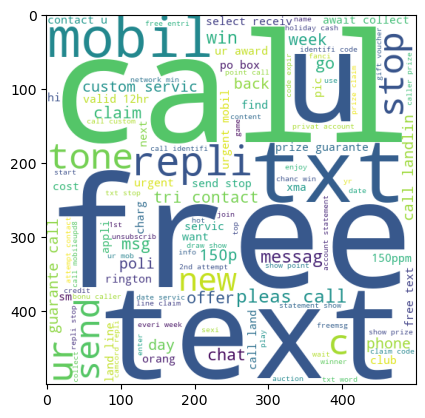

In [158]:
plt.imshow(spam_wc)

In [159]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

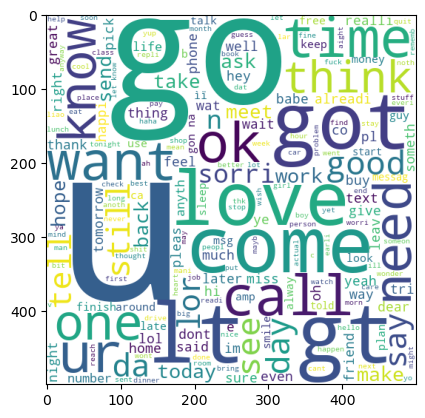

In [160]:
plt.imshow(ham_wc)

In [164]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text']:
    for word in msg.split():
        spam_corpus.append(word)

In [166]:
from collections import Counter

In [180]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


### Model building

In [181]:
df.head()

,target,text,number_character,number_words,number_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [182]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [217]:
tv = TfidfVectorizer(max_features=3000)
X = tv.fit_transform(df['transformed_text']).toarray()

In [218]:
X.shape

(5169, 3000)

In [219]:
y = df["target"]

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [222]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [223]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [224]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score

In [225]:
# Because data is imbalance therefore the precision score is more valuable than accuracy score

In [226]:
gnb.fit(X_train,y_train)
pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(precision_score(y_test,pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [227]:
mnb.fit(X_train,y_train)
pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(precision_score(y_test,pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [228]:
bnb.fit(X_train,y_train)
pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(precision_score(y_test,pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [237]:
message = ["WINNER! Call 09012345678 now to claim your lottery prize!"]
msg_vectorizer = tv.transform(message)
if bnb.predict(msg_vectorizer)[0]==1:
    print("It is spam")
else:
    print("Not spam")

It is spam
